In [94]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from pandas.io.parsers import read_csv

train_df = read_csv("train.csv")
test_df = read_csv("test.csv")
test_labels = read_csv("gender_submission.csv")

In [96]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [97]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [98]:
test_labels

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [99]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [102]:
test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [103]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [104]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [106]:
test_labels.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

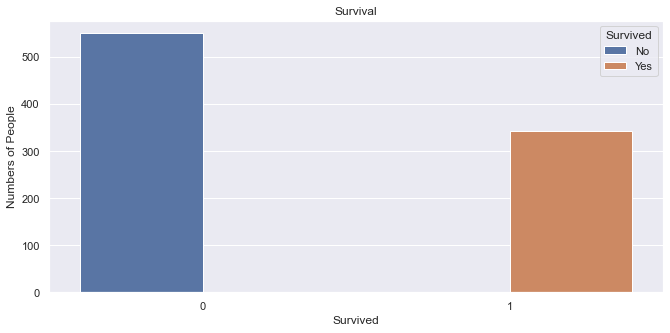

In [107]:
plt.figure(figsize=(11,5))
sns.set_theme(style="darkgrid")
sns.countplot(data=train_df,x="Survived",hue="Survived")
plt.title("Survival")
plt.xlabel("Survived")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [108]:
passengers = train_df["Survived"].count()
died = train_df[train_df["Survived"]==0]["Survived"].count()
survived = train_df[train_df["Survived"]==1]["Survived"].count()

f"Of the {passengers} passengers, {died} died, {survived} survived."

'Of the 891 passengers, 549 died, 342 survived.'

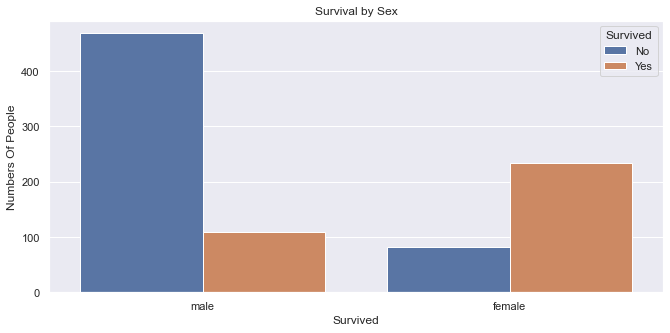

In [109]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df,x="Sex",hue="Survived")
plt.title("Survival by Sex")
plt.xlabel("Survived")
plt.ylabel("Numbers Of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [110]:
male = train_df[(train_df["Sex"]=="male")]["Survived"].count()
female = train_df[(train_df["Sex"]=="female")]["Survived"].count()

survived_male = train_df[(train_df["Sex"]=="male") & (train_df["Survived"] == 1)]["Survived"].count()
survived_female = train_df[(train_df["Sex"]=="female") & (train_df["Survived"] == 1)]["Survived"].count()

died_male = train_df[(train_df["Sex"]=="male") & (train_df["Survived"] == 0)]["Survived"].count()
died_female = train_df[(train_df["Sex"]=="female") & (train_df["Survived"] == 0)]["Survived"].count()

f"There are {female} female and {male} male passengers in total. Survived Male={survived_male}, Died Male={died_male}, Survived Female={survived_female}, Died Female={died_female}"

'There are 314 female and 577 male passengers in total. Survived Male=109, Died Male=468, Survived Female=233, Died Female=81'

In [111]:
train_df[["Sex","Survived"]].groupby(["Sex"]).mean()

,Survived
Sex,
female,0.742038
male,0.188908


Kadınlarda hayatta kalma oranı daha yüksek. Cinsiyet büyük oranda belirleyici bir etken.

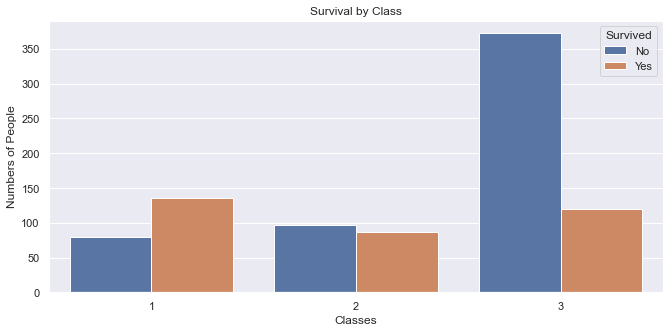

In [112]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df,x="Pclass",hue="Survived")
plt.title("Survival by Class")
plt.xlabel("Classes")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [113]:
train_df[["Survived","Pclass"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Üst sınıf yolcularda hayatta kalma oranı daha fazla. Sınıf hayatta kalmayı belirleyici bir etken.

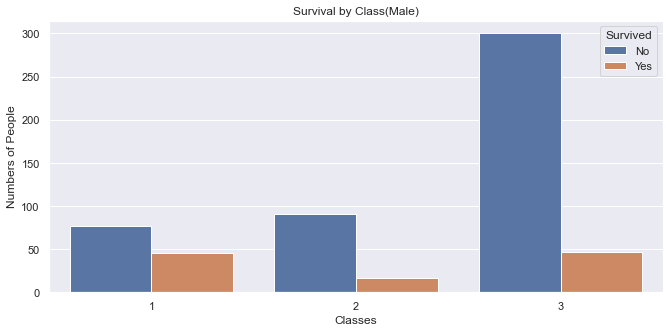

In [114]:
passengers = train_df["Survived"].count()
died = train_df[train_df["Survived"]==0]["Survived"].count()
survived = train_df[train_df["Survived"]==1]["Survived"].count()



plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Sex"]=="male"],x="Pclass",hue="Survived")
plt.title("Survival by Class(Male)")
plt.xlabel("Classes")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

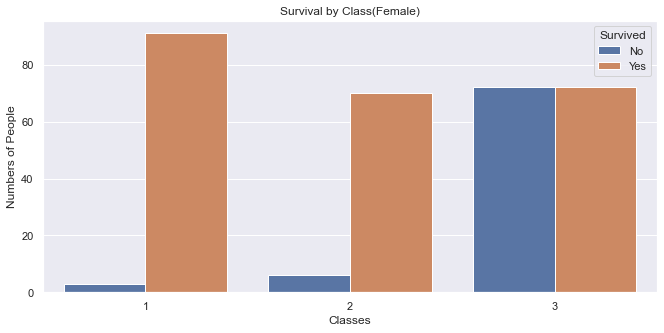

In [115]:
passengers = train_df["Survived"].count()
died = train_df[train_df["Survived"]==0]["Survived"].count()
survived = train_df[train_df["Survived"]==1]["Survived"].count()

plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Sex"]=="female"],x="Pclass",hue="Survived")
plt.title("Survival by Class(Female)")
plt.xlabel("Classes")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [116]:
train_df[["Survived","Pclass","Sex"]].groupby(["Pclass","Sex"]).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

Sınıf Belirleleyici bir etken olsada cinsiyetin ağırlığı daha fazla

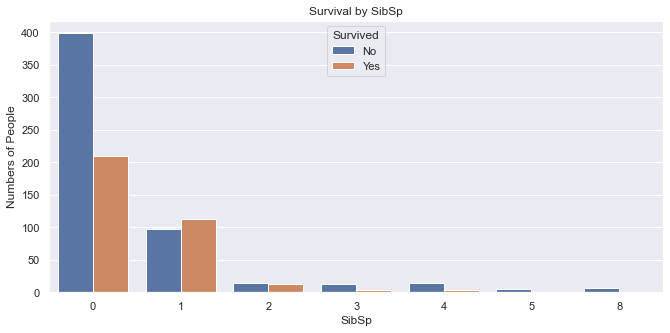

In [117]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df,x="SibSp",hue="Survived")
plt.title("Survival by SibSp")
plt.xlabel("SibSp")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [118]:
train_df[["SibSp","Survived"]].groupby(["SibSp"]).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [119]:
train_df[["SibSp"]].value_counts()

SibSp
0        608
1        209
2         28
4         18
3         16
8          7
5          5
dtype: int64

Yolcuların gemide yakınlarının bulunması etkili bir özellik olsada gemide 5 ve 8 yakını olanların sayısı az ve hiçbirinin kurtulamamış olması yanlılığı arttıracaktır. Bu sebeble gemide yakını var veya yok şeklinde bir kategorik veriye dönüştüreceğiz.

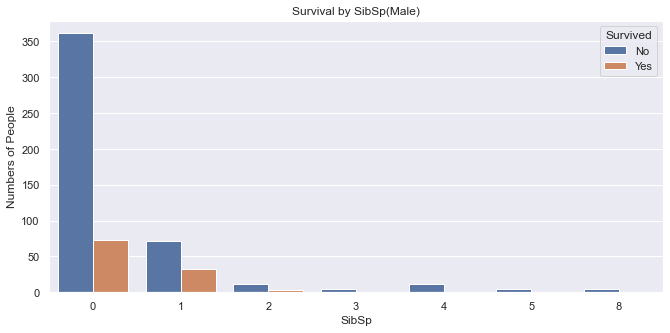

In [120]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Sex"]=="male"],x="SibSp",hue="Survived")
plt.title("Survival by SibSp(Male)")
plt.xlabel("SibSp")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

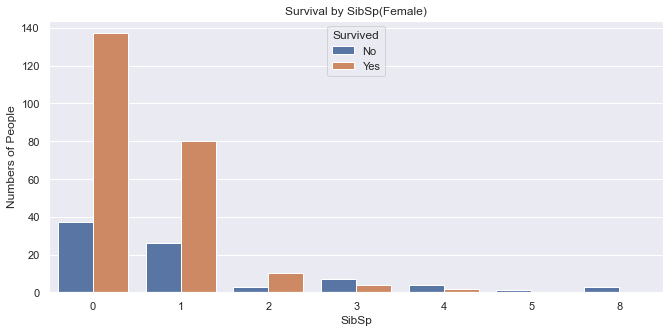

In [121]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Sex"]=="female"],x="SibSp",hue="Survived")
plt.title("Survival by SibSp(Female)")
plt.xlabel("SibSp")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [122]:
train_df[["SibSp","Survived","Sex"]].groupby(["SibSp","Sex"]).mean()

Survived
SibSp Sex             
0     female  0.787356
      male    0.168203
1     female  0.754717
      male    0.310680
2     female  0.769231
      male    0.200000
3     female  0.363636
      male    0.000000
4     female  0.333333
      male    0.083333
5     female  0.000000
      male    0.000000
8     female  0.000000
      male    0.000000

Yolcuların Gemide yakınlarının bulunması erkeklerde daha etkili bir özellik gibi gözüküyor.

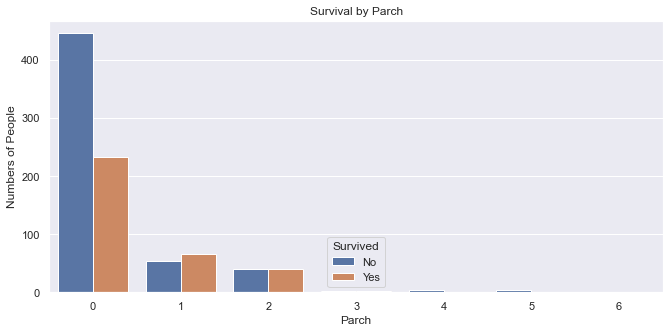

In [123]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df,x="Parch",hue="Survived")
plt.title("Survival by Parch")
plt.xlabel("Parch")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [124]:
train_df[["Parch","Survived"]].groupby(["Parch"]).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [125]:
train_df[["Parch"]].value_counts()

Parch
0        678
1        118
2         80
3          5
5          5
4          4
6          1
dtype: int64

Yolcuların gemide çocuklarının bulunması da etkili bir özellik olduğu gözüküyor fakat 3 ve daha fazla çocuğu bulunanların sayısı az olduğundan çocuğu var veya yok şeklinde bir kategorik veriye dönüştüreceğiz.

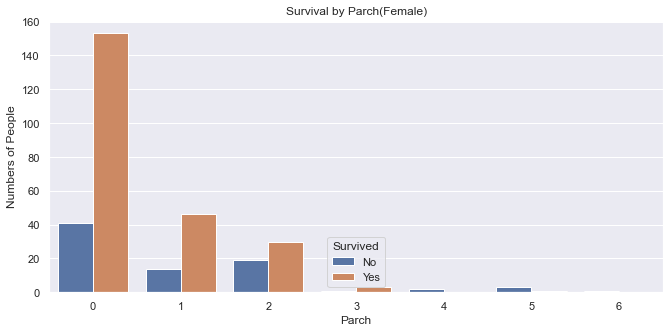

In [126]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Sex"]=="female"],x="Parch",hue="Survived")
plt.title("Survival by Parch(Female)")
plt.xlabel("Parch")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

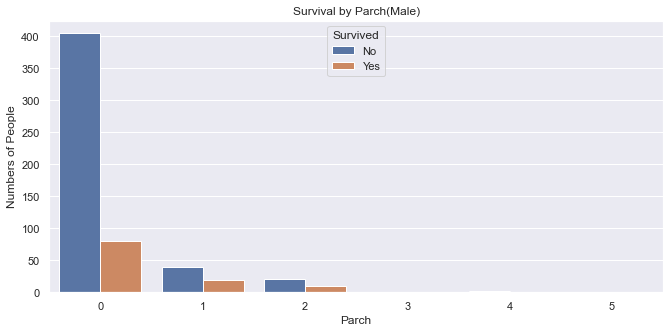

In [127]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Sex"]=="male"],x="Parch",hue="Survived")
plt.title("Survival by Parch(Male)")
plt.xlabel("Parch")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [128]:
train_df[["Parch","Survived","Sex"]].groupby(["Parch","Sex"]).mean()

Survived
Parch Sex             
0     female  0.788660
      male    0.165289
1     female  0.766667
      male    0.327586
2     female  0.612245
      male    0.322581
3     female  0.750000
      male    0.000000
4     female  0.000000
      male    0.000000
5     female  0.250000
      male    0.000000
6     female  0.000000

Gemide çocuğu bulunan yolcuların kurtulma oranılarının erkeklerde daha belirleyici olduğu görülüyor.

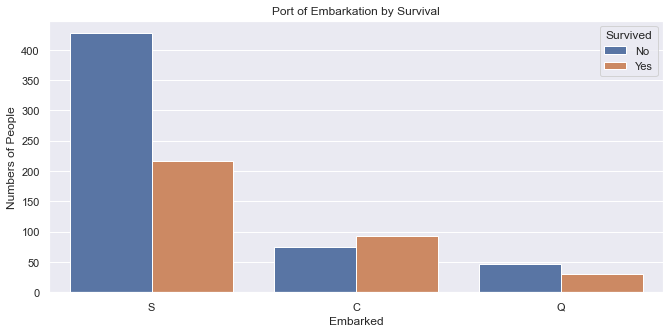

In [129]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df,x="Embarked",hue="Survived")
plt.title("Port of Embarkation by Survival")
plt.xlabel("Embarked")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [130]:
train_df[["Embarked","Survived"]].groupby(["Embarked"]).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Gemiye Cherbourg'da binenlerin hayatta kalma oranının daha fazla olduğu görülüyor.  

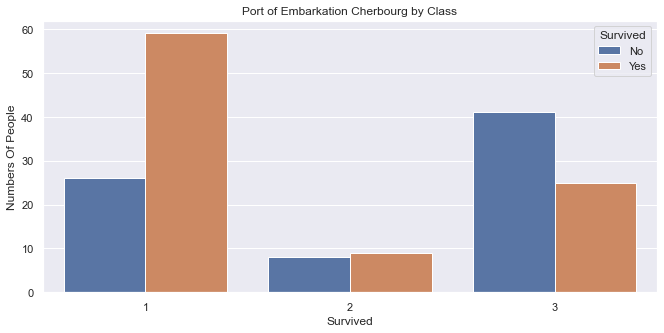

In [131]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Embarked"]=="C"],x="Pclass",hue="Survived")
plt.title("Port of Embarkation Cherbourg by Class")
plt.xlabel("Survived")
plt.ylabel("Numbers Of People")
plt.legend(title="Survived",labels=["No","Yes"])

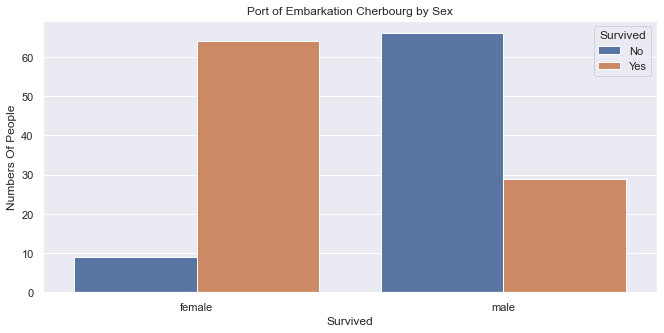

In [132]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Embarked"]=="C"],x="Sex",hue="Survived")
plt.title("Port of Embarkation Cherbourg by Sex")
plt.xlabel("Survived")
plt.ylabel("Numbers Of People")
plt.legend(title="Survived",labels=["No","Yes"])

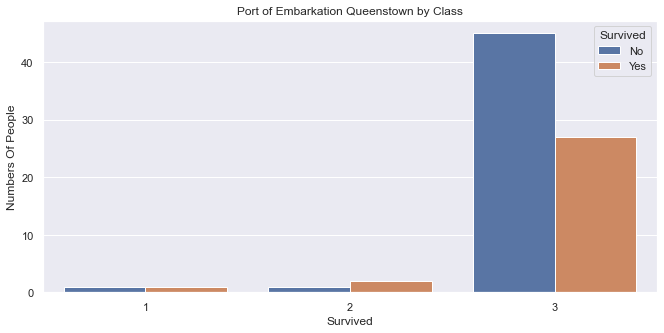

In [133]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Embarked"]=="Q"],x="Pclass",hue="Survived")
plt.title("Port of Embarkation Queenstown by Class")
plt.xlabel("Survived")
plt.ylabel("Numbers Of People")
plt.legend(title="Survived",labels=["No","Yes"])

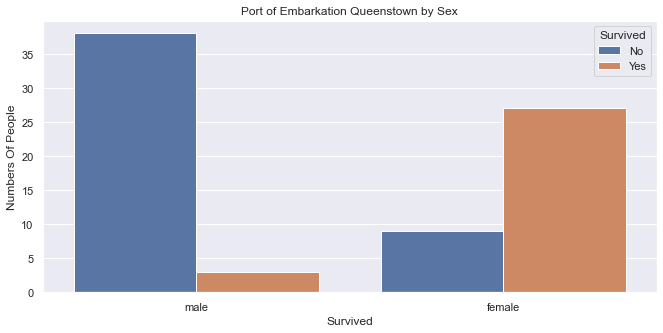

In [134]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Embarked"]=="Q"],x="Sex",hue="Survived")
plt.title("Port of Embarkation Queenstown by Sex")
plt.xlabel("Survived")
plt.ylabel("Numbers Of People")
plt.legend(title="Survived",labels=["No","Yes"])

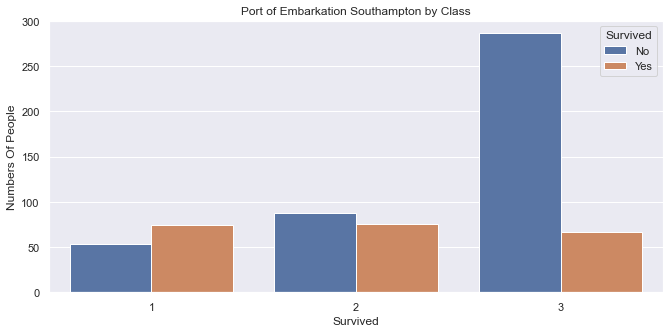

In [135]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Embarked"]=="S"],x="Pclass",hue="Survived")
plt.title("Port of Embarkation Southampton by Class")
plt.xlabel("Survived")
plt.ylabel("Numbers Of People")
plt.legend(title="Survived",labels=["No","Yes"])

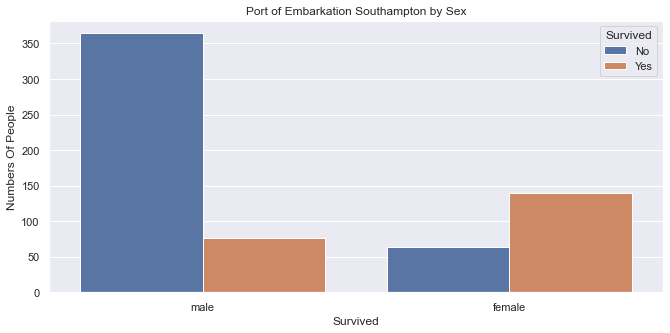

In [136]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Embarked"]=="S"],x="Sex",hue="Survived")
plt.title("Port of Embarkation Southampton by Sex")
plt.xlabel("Survived")
plt.ylabel("Numbers Of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [137]:
train_df[["Embarked","Survived","Pclass"]].groupby(["Embarked","Pclass"]).mean()

Survived
Embarked Pclass          
C        1       0.694118
         2       0.529412
         3       0.378788
Q        1       0.500000
         2       0.666667
         3       0.375000
S        1       0.582677
         2       0.463415
         3       0.189802

Gemiye Cherbourg'da binen yolcuların hayatta kalma oranının yüksek olmasının sebebi gemiye binen yolcularda  1. sınıf oranının yüksek olması ve kadın yolcuların oranının diğer limanlardan binen kadın yolcu oranlarına göre fazla olması gibi gözüküyor.

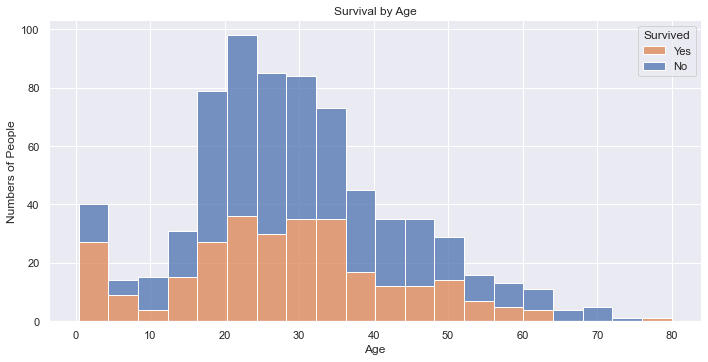

In [138]:
sns.displot(data=train_df,x="Age",hue="Survived", multiple="stack",height=5,aspect=2,legend=False)
plt.title("Survival by Age")
plt.xlabel("Age")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["Yes","No"])

In [139]:
train_df.loc[train_df["Age"].isnull(),"Age"] = 0
train_df.loc[(train_df["Age"]>=0.1)&(train_df["Age"]<5),"Age"] = 1
train_df.loc[(train_df["Age"]>=5)&(train_df["Age"]<16),"Age"] = 2
train_df.loc[(train_df["Age"]>=16)&(train_df["Age"]<32),"Age"] = 3
train_df.loc[(train_df["Age"]>=32)&(train_df["Age"]<48),"Age"] = 4
train_df.loc[(train_df["Age"]>=48),"Age"] = 5

In [140]:
train_df = train_df.astype({"Age":"int32"})
train_df = train_df.astype({"Age":"category"})

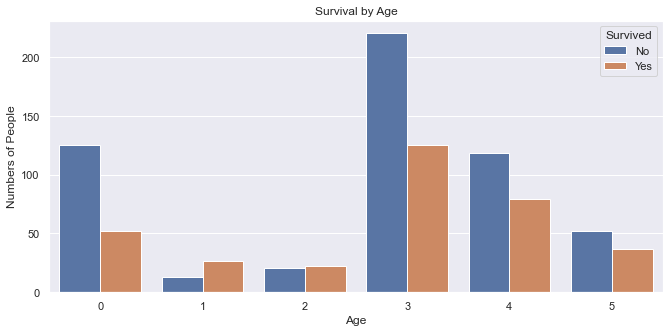

In [141]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df,x="Age",hue="Survived")
plt.title("Survival by Age")
plt.xlabel("Age")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [142]:
train_df[["Age","Survived"]].groupby(["Age"]).mean()

,Survived
Age,
0,0.293785
1,0.675000
2,0.511628
3,0.362319
4,0.401015
5,0.415730


Yaşı küçük olan yolcuların hayatta kalma oranının daha fazla olduğu görülüyor.

In [143]:
train_df[["Age","Survived","Pclass"]].groupby(["Age","Pclass"]).mean()

Survived
Age Pclass          
0   1       0.466667
    2       0.363636
    3       0.250000
1   1       0.666667
    2       1.000000
    3       0.520000
2   1       1.000000
    2       1.000000
    3       0.363636
3   1       0.733333
    2       0.414634
    3       0.231527
4   1       0.666667
    2       0.450980
    3       0.150000
5   1       0.537037
    2       0.333333
    3       0.071429

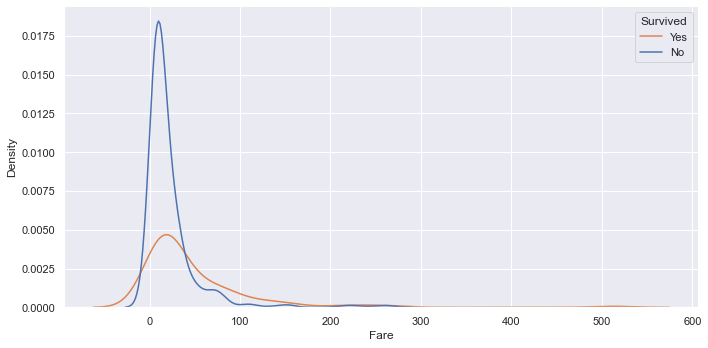

In [144]:
sns.displot(data=train_df,x="Fare",hue="Survived",kind="kde",height=5,aspect=2,legend=False)
plt.legend(title="Survived",labels=["Yes","No"])

In [145]:
q1 = train_df["Fare"].quantile(0.25)
median = train_df["Fare"].quantile(0.5)
q3 = train_df["Fare"].quantile(0.75)

train_df.loc[train_df["Fare"].isnull(),"Fare"] = 0
train_df.loc[train_df["Fare"] < q1,"Fare"] = 1
train_df.loc[(train_df["Fare"] >= q1)&(train_df["Fare"] < median),"Fare"] = 2
train_df.loc[(train_df["Fare"] >= median)&(train_df["Fare"]<q3),"Fare"] = 3
train_df.loc[(train_df["Fare"] >= q3)&(train_df["Fare"] < 100),"Fare"] = 4
train_df.loc[train_df["Fare"] > 100,"Fare"] = 5

In [146]:
train_df = train_df.astype({"Fare":"int32"})

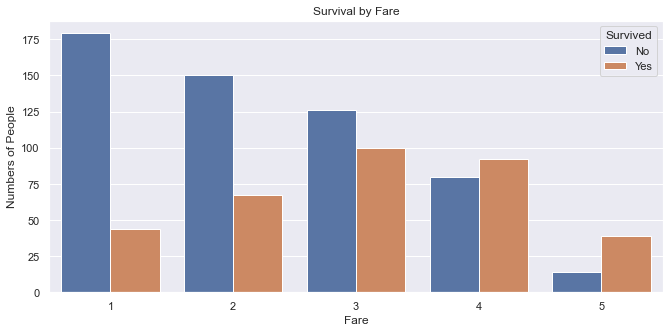

In [147]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df,x="Fare",hue="Survived")
plt.title("Survival by Fare")
plt.xlabel("Fare")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [148]:
train_df[["Fare","Survived"]].groupby(["Fare"]).mean()

,Survived
Fare,
1,0.197309
2,0.308756
3,0.442478
4,0.534884
5,0.735849


Gemi biletine ödenen miktar arttıkça hayatta kalma oranları belirgin bir şekilde artıyor. 

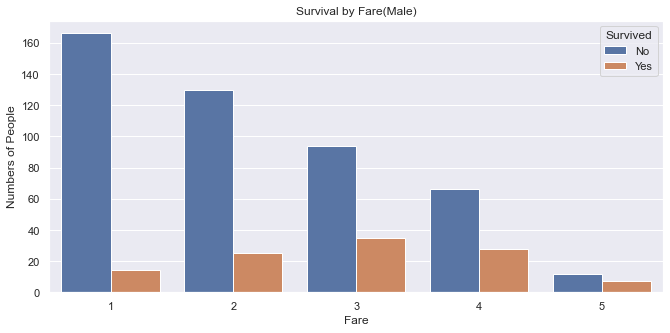

In [149]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Sex"]=="male"],x="Fare",hue="Survived")
plt.title("Survival by Fare(Male)")
plt.xlabel("Fare")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

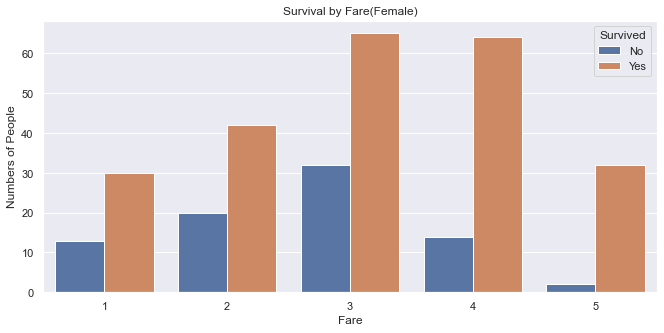

In [150]:
plt.figure(figsize=(11,5))
sns.countplot(data=train_df[train_df["Sex"]=="female"],x="Fare",hue="Survived")
plt.title("Survival by Fare(Female)")
plt.xlabel("Fare")
plt.ylabel("Numbers of People")
plt.legend(title="Survived",labels=["No","Yes"])

In [151]:
train_df[["Fare","Survived","Sex"]].groupby(["Fare","Sex"]).mean()

Survived
Fare Sex             
1    female  0.697674
     male    0.077778
2    female  0.677419
     male    0.161290
3    female  0.670103
     male    0.271318
4    female  0.820513
     male    0.297872
5    female  0.941176
     male    0.368421

Gemi biletine ödenen miktar arttıkça hayatta kalma oranları cinsiyet farketmeksizin belirgin bir şekilde artıyor. Ancak hayatta kalma oranlarında yine kadınlar daha baskın.

In [152]:
train_df.loc[train_df["Embarked"].isnull(),"Embarked"] = 0
train_df.loc[train_df["Embarked"]=="C","Embarked"] = 1
train_df.loc[train_df["Embarked"]=="Q","Embarked"] = 2
train_df.loc[train_df["Embarked"]=="S","Embarked"] = 3

In [153]:
train_df.loc[train_df["Sex"].isnull(),"Sex"] = 0
train_df.loc[train_df["Sex"]=="male","Sex"] = 1
train_df.loc[train_df["Sex"]=="female","Sex"] = 2

In [154]:
train_df.loc[train_df["Parch"]==0,"Parch"] = 0
train_df.loc[train_df["Parch"]>0,"Parch"] = 1

In [155]:
train_df.loc[train_df["SibSp"]==0,"SibSp"] = 0
train_df.loc[train_df["SibSp"]>0,"SibSp"] = 1

In [156]:
train_df = train_df.astype({"Survived":"category"})
train_df = train_df.astype({"Pclass":"category"})
train_df = train_df.astype({"Sex":"category"})
train_df = train_df.astype({"SibSp":"category"})
train_df = train_df.astype({"Parch":"category"})
train_df = train_df.astype({"Fare":"category"})
train_df = train_df.astype({"Embarked":"category"})

In [157]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    category
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    category
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(8), int64(1), object(3)
memory usage: 36.2+ KB


In [158]:
test_df.loc[test_df["Age"].isnull(),"Age"] = 0
test_df.loc[(test_df["Age"]>=0.1)&(test_df["Age"]<5),"Age"] = 1
test_df.loc[(test_df["Age"]>=5)&(test_df["Age"]<16),"Age"] = 2
test_df.loc[(test_df["Age"]>=16)&(test_df["Age"]<32),"Age"] = 3
test_df.loc[(test_df["Age"]>=32)&(test_df["Age"]<48),"Age"] = 4
test_df.loc[(test_df["Age"]>=48),"Age"] = 5

In [159]:
test_df = test_df.astype({"Age":"int32"})
test_df = test_df.astype({"Age":"category"})

In [160]:
test_df.loc[test_df["Embarked"].isnull(),"Embarked"] = 0
test_df.loc[test_df["Embarked"]=="C","Embarked"] = 1
test_df.loc[test_df["Embarked"]=="Q","Embarked"] = 2
test_df.loc[test_df["Embarked"]=="S","Embarked"] = 3

In [161]:
test_df.loc[test_df["Sex"].isnull(),"Sex"] = 0
test_df.loc[test_df["Sex"]=="male","Sex"] = 1
test_df.loc[test_df["Sex"]=="female","Sex"] = 2

In [162]:
q1 = test_df["Fare"].quantile(0.25)
median = test_df["Fare"].quantile(0.5)
q3 = test_df["Fare"].quantile(0.75)

test_df.loc[test_df["Fare"].isnull(),"Fare"] = 0
test_df.loc[test_df["Fare"] < q1,"Fare"] = 1
test_df.loc[(test_df["Fare"] >= q1)&(test_df["Fare"] < median),"Fare"] = 2
test_df.loc[(test_df["Fare"] >= median)&(test_df["Fare"]<q3),"Fare"] = 3
test_df.loc[(test_df["Fare"] >= q3)&(test_df["Fare"] < 100),"Fare"] = 4
test_df.loc[test_df["Fare"] > 100,"Fare"] = 5

In [163]:
test_df = test_df.astype({"Fare":"int32"})

In [164]:
test_df.loc[test_df["Parch"]==0,"Parch"] = 0
test_df.loc[test_df["Parch"]>0,"Parch"] = 1

In [165]:
test_df.loc[test_df["SibSp"]==0,"SibSp"] = 0
test_df.loc[test_df["SibSp"]>0,"SibSp"] = 1

In [166]:
test_df = test_df.astype({"Pclass":"category"})
test_df = test_df.astype({"Sex":"category"})
test_df = test_df.astype({"SibSp":"category"})
test_df = test_df.astype({"Parch":"category"})
test_df = test_df.astype({"Fare":"category"})
test_df = test_df.astype({"Embarked":"category"})

In [167]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          418 non-null    category
 5   SibSp        418 non-null    category
 6   Parch        418 non-null    category
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    category
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(7), int64(1), object(3)
memory usage: 17.1+ KB


In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [169]:
X_train = train_df.iloc[:,lambda x : [2,4,5,6,7,9]]
X_test = test_df.iloc[:,lambda x : [1,3,4,5,6,8]]
Y_train = train_df.iloc[:,lambda x : [1]]
Y_test = test_labels.iloc[:,lambda x : [1]]

In [170]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,3,1,0,1
1,1,2,4,1,0,4
2,3,2,3,0,0,2
3,1,2,4,1,0,4
4,3,1,4,0,0,2
...,...,...,...,...,...,...
886,2,1,3,0,0,2
887,1,2,3,0,0,3
888,3,2,0,1,1,3
889,1,1,3,0,0,3


In [171]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,4,0,0,1
1,3,2,4,1,0,1
2,2,1,5,0,0,2
3,3,1,3,0,0,2
4,3,2,3,1,1,2
...,...,...,...,...,...,...
413,3,1,0,0,0,2
414,1,2,4,0,0,5
415,3,1,4,0,0,1
416,3,1,0,0,0,2


In [172]:
Y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [173]:
Y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [174]:
logistic_regression = LogisticRegression().fit(X_train,Y_train.values.ravel())
Y_pred = logistic_regression.predict(X_test)

accuary_logistic_regression = accuracy_score(Y_test,Y_pred)
precision_logistic_regression = precision_score(Y_test,Y_pred)
recall_logistic_regression = recall_score(Y_test,Y_pred)
f1_logistic_regression = f1_score(Y_test,Y_pred)

print("Accuary = ",accuary_logistic_regression)
print("Precision = ",precision_logistic_regression)
print("Recall = ",recall_logistic_regression)
print("F1 Score = ",f1_logistic_regression)

Accuary =  0.9832535885167464
Precision =  0.9559748427672956
Recall =  1.0
F1 Score =  0.977491961414791


In [175]:
knn = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":np.arange(1,25)},cv=5).fit(X_train,Y_train.values.ravel())
print("K-Nearest Neighbors Bets Parmeter = ",knn.best_params_)
print("K-Nearest Neighbors Accuracy = ",knn.best_score_)
Y_pred = knn.predict(X_test)

accuary_knn = accuracy_score(Y_test,Y_pred)
precision_knn = precision_score(Y_test,Y_pred)
recall_knn = recall_score(Y_test,Y_pred)
f1_knn = f1_score(Y_test,Y_pred)

print("Accuary = ",accuary_knn)
print("Precision = ",precision_knn)
print("Recall = ",recall_knn)
print("F1 Score = ",f1_knn)

K-Nearest Neighbors Bets Parmeter =  {'n_neighbors': 5}
K-Nearest Neighbors Accuracy =  0.8238152030632101
Accuary =  0.8708133971291866
Precision =  0.8356164383561644
Recall =  0.8026315789473685
F1 Score =  0.8187919463087249


In [176]:
svm = SVC().fit(X_train,Y_train.values.ravel())
Y_pred = svm.predict(X_test)

accuary_svm = accuracy_score(Y_test,Y_pred)
precision_svm = precision_score(Y_test,Y_pred)
recall_svm = recall_score(Y_test,Y_pred)
f1_svm = f1_score(Y_test,Y_pred)

print("Accuary = ",accuary_svm)
print("Precision = ",precision_svm)
print("Recall = ",recall_svm)
print("F1 Score = ",f1_svm)

Accuary =  0.9856459330143541
Precision =  1.0
Recall =  0.9605263157894737
F1 Score =  0.9798657718120806


In [177]:
linear_svc = LinearSVC().fit(X_train,Y_train.values.ravel())
Y_pred = linear_svc.predict(X_test)

accuary_linear_svc = accuracy_score(Y_test,Y_pred)
precision_linear_svc = precision_score(Y_test,Y_pred)
recall_linear_svc = recall_score(Y_test,Y_pred)
f1_linear_svc = f1_score(Y_test,Y_pred)

print("Accuary = ",accuary_linear_svc)
print("Precision = ",precision_linear_svc)
print("Recall = ",recall_linear_svc)
print("F1 Score = ",f1_linear_svc)

Accuary =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0


C:\Users\Orhun\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [178]:
random_forest = RandomForestClassifier().fit(X_train,Y_train.values.ravel())
Y_pred = random_forest.predict(X_test)

accuary_random_forest = accuracy_score(Y_test,Y_pred)
precision_random_forest = precision_score(Y_test,Y_pred)
recall_random_forest = recall_score(Y_test,Y_pred)
f1_random_forest = f1_score(Y_test,Y_pred)

print("Accuary = ",accuary_random_forest)
print("Precision = ",precision_random_forest)
print("Recall = ",recall_random_forest)
print("F1 Score = ",f1_random_forest)

Accuary =  0.8397129186602871
Precision =  0.7814569536423841
Recall =  0.7763157894736842
F1 Score =  0.778877887788779


In [179]:
decision_tree = DecisionTreeClassifier().fit(X_train,Y_train)
Y_pred = decision_tree.predict(X_test)

accuary_decision_tree = accuracy_score(Y_test,Y_pred)
precision_decision_tree = precision_score(Y_test,Y_pred)
recall_decision_tree = recall_score(Y_test,Y_pred)
f1_decision_tree = f1_score(Y_test,Y_pred)

print("Accuary = ",accuary_decision_tree)
print("Precision = ",precision_decision_tree)
print("Recall = ",recall_decision_tree)
print("F1 Score = ",f1_decision_tree)

Accuary =  0.8349282296650717
Precision =  0.7862068965517242
Recall =  0.75
F1 Score =  0.7676767676767676


In [180]:
perceptron = Perceptron().fit(X_train,Y_train.values.ravel())
Y_pred = perceptron.predict(X_test)

accuary_perceptron = accuracy_score(Y_test,Y_pred)
precision_perceptron = precision_score(Y_test,Y_pred)
recall_perceptron = recall_score(Y_test,Y_pred)
f1_perceptron = f1_score(Y_test,Y_pred)

print("Accuary = ",accuary_perceptron)
print("Precision = ",precision_perceptron)
print("Recall = ",recall_perceptron)
print("F1 Score = ",f1_perceptron)

Accuary =  0.7105263157894737
Precision =  0.5567765567765568
Recall =  1.0
F1 Score =  0.7152941176470589


In [181]:
gaussian = GaussianNB().fit(X_train,Y_train.values.ravel())
Y_pred = gaussian.predict(X_test)

accuary_gaussian = accuracy_score(Y_test,Y_pred)
precision_gaussian = precision_score(Y_test,Y_pred)
recall_gaussian = recall_score(Y_test,Y_pred)
f1_gaussian = f1_score(Y_test,Y_pred)

print("Accuary = ",accuary_gaussian)
print("Precision = ",precision_gaussian)
print("Recall = ",recall_gaussian)
print("F1 Score = ",f1_gaussian)

Accuary =  0.8444976076555024
Precision =  0.7701863354037267
Recall =  0.8157894736842105
F1 Score =  0.7923322683706071


In [182]:
stochastic_gradient_descent = SGDClassifier().fit(X_train,Y_train.values.ravel())
Y_pred = stochastic_gradient_descent.predict(X_test)

accuary_stochastic_gradient_descent = accuracy_score(Y_test,Y_pred)
precision_stochastic_gradient_descent = precision_score(Y_test,Y_pred)
recall_stochastic_gradient_descent = recall_score(Y_test,Y_pred)
f1_stochastic_gradient_descent = f1_score(Y_test,Y_pred)

print("Accuary = ",accuary_stochastic_gradient_descent)
print("Precision = ",precision_stochastic_gradient_descent)
print("Recall = ",recall_stochastic_gradient_descent)
print("F1 Score = ",f1_stochastic_gradient_descent)

Accuary =  0.7942583732057417
Precision =  0.6386554621848739
Recall =  1.0
F1 Score =  0.7794871794871795


In [183]:
models = pd.DataFrame({"Model":["Logistic Regression","KNN","SVM","Linear SVC","Random Forest","Decision Tree","Perceptron","Naive Bayes","Stochastic Gradient Decent"],
                        "Accuary Score":[accuary_logistic_regression,accuary_knn,accuary_svm,accuary_linear_svc,accuary_random_forest,accuary_decision_tree,accuary_perceptron,accuary_gaussian,accuary_stochastic_gradient_descent],
                        "Precision Score":[precision_logistic_regression,precision_knn,precision_svm,precision_linear_svc,precision_random_forest,precision_decision_tree,precision_perceptron,precision_gaussian,precision_stochastic_gradient_descent],        
                        "Recall Score":[recall_logistic_regression,recall_knn,recall_svm,recall_linear_svc,recall_random_forest,recall_decision_tree,recall_perceptron,recall_gaussian,recall_stochastic_gradient_descent],
                        "F1 Score":[f1_logistic_regression,f1_knn,f1_svm,f1_linear_svc,f1_random_forest,f1_decision_tree,f1_perceptron,f1_gaussian,f1_stochastic_gradient_descent]
                        })

In [184]:
models.sort_values(by="Accuary Score", ascending=False)

,Model,Accuary Score,Precision Score,Recall Score,F1 Score
3,Linear SVC,1.000000,1.000000,1.000000,1.000000
2,SVM,0.985646,1.000000,0.960526,0.979866
0,Logistic Regression,0.983254,0.955975,1.000000,0.977492
1,KNN,0.870813,0.835616,0.802632,0.818792
7,Naive Bayes,0.844498,0.770186,0.815789,0.792332
4,Random Forest,0.839713,0.781457,0.776316,0.778878
5,Decision Tree,0.834928,0.786207,0.750000,0.767677
8,Stochastic Gradient Decent,0.794258,0.638655,1.000000,0.779487
6,Perceptron,0.710526,0.556777,1.000000,0.715294


In [185]:
prediction = svm.predict(X_test)

In [186]:
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"],"Survived": prediction})
submission
submission.to_csv('submission.csv', index=False)